# AI vs Human texts

Done by: Sebastian Sarasti

# Load basic libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import sys
import os

In [3]:
sys.path.append('../src')

## Load environment variables

In [4]:
from dotenv import load_dotenv

In [5]:
load_dotenv('../.env')

True

# Data processing

Load data to process

In [6]:
df = pd.read_parquet('../data/AI_Human_cleaned.parquet')

Get the environment variables to register the data transformers

In [7]:
MLFLOW_URI = os.getenv('MLFLOW_URI')
MLFLOW_EXPERIMENT_NAME = "AI-Human-Classification"
MLFLOW_EXPERIMENT_RUNNAME = "Preprocessors"

Transform data to get numerical features for the classification

In [8]:
from utils.text_features import FeatureTextExtraction

In [9]:
feature_extractor = FeatureTextExtraction(MLFLOW_URI, MLFLOW_EXPERIMENT_NAME, MLFLOW_EXPERIMENT_RUNNAME)

In [10]:
df_final = feature_extractor.fit_transform(df)

2024/02/15 15:51:21 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/02/15 15:51:30 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
c:\Users\sebit\.conda\envs\mlops\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\sebit\.conda\envs\mlops\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Verificar el balanceamiento de las clases

In [11]:
import seaborn as sns

<Axes: xlabel='generated', ylabel='Percent'>

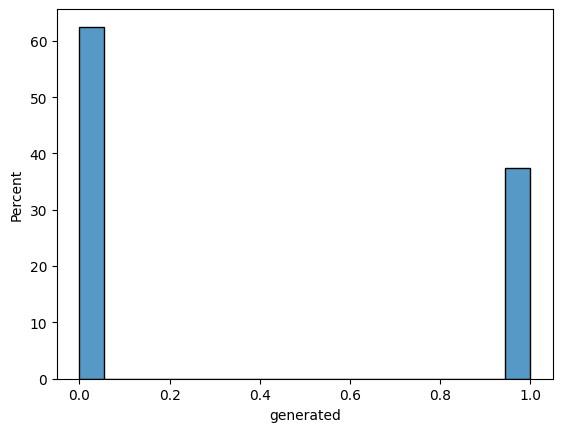

In [12]:
sns.histplot(data = df_final, x = "generated", stat = "percent")

# Model creation

## Model1

Make a train test split

In [13]:
Y = df_final['generated']
X = df_final[['dim1', 'dim2', 'dim3', 'dim4', 'dim5']]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Model creation

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
model1 = RandomForestClassifier()

In [18]:
model1.fit(X_train, Y_train)

RandomForestClassifier()

Model registry

In [19]:
from utils.log_model import LogModel

In [20]:
logger = LogModel(MLFLOW_URI, MLFLOW_EXPERIMENT_NAME, "model-classification-rf", X_train, Y_train, X_test, Y_test, model1, "random-forest")

In [21]:
logger.fit_transform()

c:\Users\sebit\.conda\envs\mlops\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\sebit\.conda\envs\mlops\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Model performance over the test dataset
{'0.0': {'precision': 0.9149017606532278, 'recall': 0.9554963357761492, 'f1-score': 0.934758521801473, 'support': 7505.0}, '1.0': {'precision': 0.9197501201345507, 'recall': 0.8516129032258064, 'f1-score': 0.8843710292249047, 'support': 4495.0}, 'macro avg': {'precision': 0.9173259403938893, 'recall': 0.9035546195009778, 'f1-score': 0.9095647755131888, 'support': 12000.0}, 'weighted avg': {'precision': 0.91671787530894, 'recall': 0.9165833333333333, 'f1-score': 0.9158842068738334, 'support': 12000.0}}


In [31]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(Y_test, model1.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93      7505
         1.0       0.92      0.85      0.88      4495

    accuracy                           0.92     12000
   macro avg       0.92      0.90      0.91     12000
weighted avg       0.92      0.92      0.92     12000



In [36]:
classification_report(Y_test, model1.predict(X_test), output_dict=True)

{'0.0': {'precision': 0.9162826420890937,
  'recall': 0.9537641572285144,
  'f1-score': 0.9346477769798264,
  'support': 7505.0},
 '1.0': {'precision': 0.9171442215854824,
  'recall': 0.8545050055617353,
  'f1-score': 0.8847172636185651,
  'support': 4495.0},
 'accuracy': 0.9165833333333333,
 'macro avg': {'precision': 0.916713431837288,
  'recall': 0.9041345813951248,
  'f1-score': 0.9096825202991957,
  'support': 12000.0},
 'weighted avg': {'precision': 0.9166053754087826,
  'recall': 0.9165833333333333,
  'f1-score': 0.9159446388499206,
  'support': 12000.0}}

## Model 2

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model2 = LogisticRegression()

In [24]:
model2.fit(X_train, Y_train)

LogisticRegression()

In [27]:
logger2 = LogModel(MLFLOW_URI, MLFLOW_EXPERIMENT_NAME, "model-classification-lr", X_train, Y_train, X_test, Y_test, model2, "linear-regression")

In [28]:
logger2.fit_transform()

c:\Users\sebit\.conda\envs\mlops\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\sebit\.conda\envs\mlops\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Model performance over the test dataset
{'0.0': {'precision': 0.8431372549019608, 'recall': 0.9052631578947369, 'f1-score': 0.8730964467005076, 'support': 7505.0}, '1.0': {'precision': 0.819634703196347, 'recall': 0.7187986651835373, 'f1-score': 0.7659120540476473, 'support': 4495.0}, 'macro avg': {'precision': 0.8313859790491539, 'recall': 0.8120309115391371, 'f1-score': 0.8195042503740775, 'support': 12000.0}, 'weighted avg': {'precision': 0.834333590742233, 'recall': 0.8354166666666667, 'f1-score': 0.8329469596192903, 'support': 12000.0}}


## Model 3

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
model3 = KNeighborsClassifier()

In [31]:
model3.fit(X_train, Y_train)

KNeighborsClassifier()

In [35]:
logger3 = LogModel(MLFLOW_URI, MLFLOW_EXPERIMENT_NAME, "model-classification-knn", X_train, Y_train, X_test, Y_test, model3, "knn")

In [36]:
logger3.fit_transform()

c:\Users\sebit\.conda\envs\mlops\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\sebit\.conda\envs\mlops\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Model performance over the test dataset
{'0.0': {'precision': 0.903989703989704, 'recall': 0.9359093937375084, 'f1-score': 0.9196726677577741, 'support': 7505.0}, '1.0': {'precision': 0.8862884160756501, 'recall': 0.8340378197997775, 'f1-score': 0.8593696275071633, 'support': 4495.0}, 'macro avg': {'precision': 0.8951390600326771, 'recall': 0.8849736067686429, 'f1-score': 0.8895211476324687, 'support': 12000.0}, 'weighted avg': {'precision': 0.8973590965585646, 'recall': 0.89775, 'f1-score': 0.8970841539305661, 'support': 12000.0}}


## Model 4

In [38]:
from xgboost import XGBClassifier

In [39]:
model4 = XGBClassifier()

In [40]:
model4.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
logger4 = LogModel(MLFLOW_URI, MLFLOW_EXPERIMENT_NAME, "model-classification-xgboost", X_train, Y_train, X_test, Y_test, model4, "xgboost")

In [42]:
logger4.fit_transform()

c:\Users\sebit\.conda\envs\mlops\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\sebit\.conda\envs\mlops\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Model performance over the test dataset
{'0.0': {'precision': 0.9077732170343766, 'recall': 0.9429713524317122, 'f1-score': 0.9250375792431867, 'support': 7505.0}, '1.0': {'precision': 0.8981921979067554, 'recall': 0.8400444938820912, 'f1-score': 0.8681457638809058, 'support': 4495.0}, 'macro avg': {'precision': 0.9029827074705661, 'recall': 0.8915079231569016, 'f1-score': 0.8965916715620463, 'support': 12000.0}, 'weighted avg': {'precision': 0.9041843269528219, 'recall': 0.9044166666666666, 'f1-score': 0.903726853405399, 'support': 12000.0}}
